In [62]:
import numpy as np
import tensorflow as tf

keras = tf.keras

In [63]:

num_samples =1000
vocabulary_size = 10000

num_tags = 100
num_departments = 4 


title_data = np.random.randint(0,2 , size = (num_samples , vocabulary_size))
text_body_data = np.random.randint(0,2 , size = (num_samples, vocabulary_size))

tags_data = np.random.randint(0,2 , size = (num_samples, num_tags))



In [64]:
priority_data = np.random.random(size = (num_samples, 1 ))
# department_data=  np.random.randint(0,num_departments, size= (num_samples, num_departments))
# 
# 
# 
# department_data[:10]

random_department_labels = np.random.randint(0, num_departments , size = (num_samples,))

one_hot_encoded = np.eye(num_departments)[random_department_labels]
department_data =  one_hot_encoded





In [65]:
from keras import Model,Input
from keras.layers import Concatenate, Dense


title = Input(shape=(vocabulary_size,) , name='title' )
text_body = Input(shape=(vocabulary_size,) , name ='text_body')
tags = Input(shape =( num_tags,  ) , name ='tags')



In [66]:
features = Concatenate()([title, text_body, tags])


features = Dense(64  , activation='relu')(features)

priority = Dense(1 , activation='sigmoid' , name='priority')(features)
department = Dense(num_departments , activation='softmax' , name='department')(features)




model  = Model(inputs=[title, text_body, tags] , outputs = [priority, department])

In [67]:
model.compile('rmsprop' , loss = {
    'priority':'mean_squared_error',
    'department':'categorical_crossentropy'
} , metrics = {
    'priority':['mae'],
    'department':['accuracy']
})

In [68]:
from keras import callbacks

tensorboard = callbacks.TensorBoard(
    log_dir='./'
)
model.fit({
    'title':title_data, 'text_body':text_body_data , 'tags':tags_data
} , {
    'priority':priority_data,
    'department':department_data
} , epochs = 5 , callbacks=[tensorboard])

Epoch 1/5
32/32 [==============================] - 1s 6ms/step - loss: 11.3573 - priority_loss: 0.2371 - department_loss: 11.1203 - priority_mae: 0.4023 - department_accuracy: 0.2510
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 5.3582 - priority_loss: 0.2430 - department_loss: 5.1151 - priority_mae: 0.4086 - department_accuracy: 0.2820
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 4.0302 - priority_loss: 0.1612 - department_loss: 3.8690 - priority_mae: 0.3290 - department_accuracy: 0.2730
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 3.6165 - priority_loss: 0.1570 - department_loss: 3.4595 - priority_mae: 0.3234 - department_accuracy: 0.2880
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 3.1444 - priority_loss: 0.1520 - department_loss: 2.9925 - priority_mae: 0.3209 - department_accuracy: 0.3770


In [69]:
model.evaluate({'title':title_data , 'text_body':text_body_data , 'tags':tags_data}, {'priority': priority_data  , 'department':department_data})

32/32 [==============================] - 0s 3ms/step - loss: 4.7178 - priority_loss: 0.1711 - department_loss: 4.5467 - priority_mae: 0.3404 - department_accuracy: 0.4690


[4.717846870422363,
 0.17113500833511353,
 4.546711444854736,
 0.3403919041156769,
 0.4690000116825104]

In [70]:
priority_preds, department_preds = model.predict(
{"title": title_data, "text_body": text_body_data, "tags": tags_data})

32/32 [==============================] - 0s 3ms/step


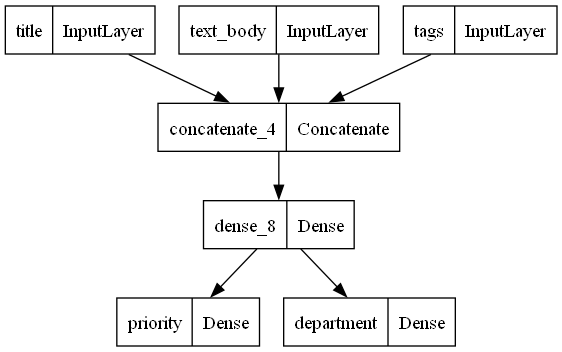

In [71]:
from keras.utils import plot_model


plot_model(model, 'ticket_classifier.png')

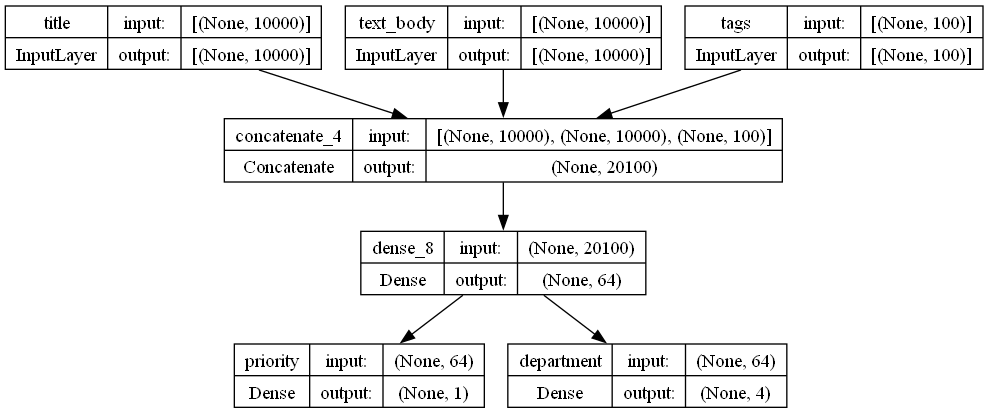

In [72]:
plot_model(model, "ticket_classifier_shape_info.png", show_shapes=True)

In [73]:
new_features = model.layers[4].output

In [74]:
difficulty = Dense(3, activation='softmax', name='difficulty')(new_features)

In [75]:
new_model  = Model(inputs =[title, text_body, tags] , outputs = [priority, department , difficulty])

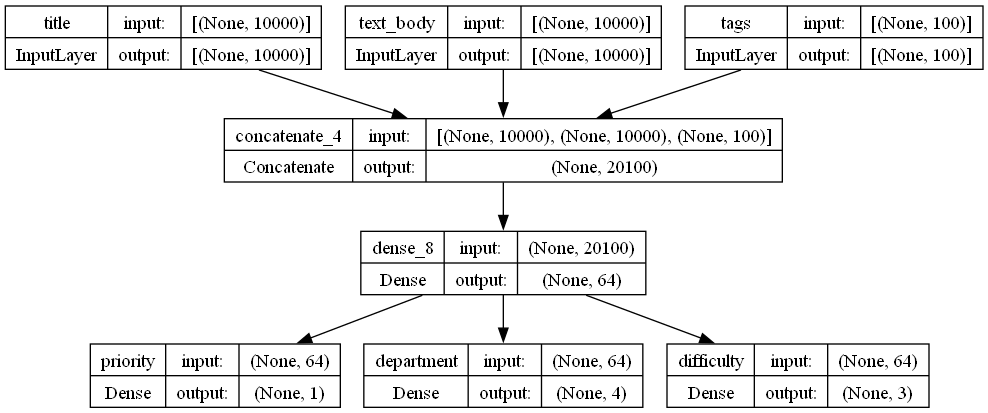

In [76]:
plot_model(new_model , "updated_ticket_classifier.png" , show_shapes=True)

In [77]:
from keras import layers

In [78]:
class CustomerTicketModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__()
        
        self.concat_layer= layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation='relu')
        self.priority_scorer = layers.Dense(1, activation='sigmoid')
        self.department_classifier = layers.Dense(num_departments, activation='softmax')
        
        
    def call(self, inputs):
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']
            
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
            
        priority = self.priority_scorer(features)
            
        department = self.department_classifier(features)
        return priority, department 

In [79]:
model = CustomerTicketModel(num_departments = 4 )

In [80]:
priority, department = model(inputs = {'title':title_data , 'text_body' : text_body_data , 'tags':tags_data})

In [81]:
model.compile(optimizer="rmsprop",
loss=["mean_squared_error", "categorical_crossentropy"], 
metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data, 
"text_body": text_body_data, 
"tags": tags_data}, 
[priority_data, department_data], 
epochs=1)
model.evaluate({"title": title_data,
"text_body": text_body_data,
"tags": tags_data},
[priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
"text_body": text_body_data,
"tags": tags_data})


32/32 [==============================] - 0s 3ms/step
